# Unit 5 - Financial Planning


In [13]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [14]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [15]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [16]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_url= btc_url + "?format=json"
eth_url= eth_url + "?format=json"

In [17]:
# Fetch current BTC price
price_btc = requests.get(btc_url)
# Retrieving output for btc for the names of rows
response_btc = price_btc.content
# Converting to a JSON file type 
btc_data = price_btc.json()

# Fetch current ETH price
price_eth = requests.get(eth_url)
# Retrieving output for eth for the names of rows
response_eth = price_eth.content
# Converting to a JSON file type
eth_data = price_eth.json()



In [20]:
# Compute current value of my crpto
price_btc = btc_data['data']['1']['quotes']['USD']['price']
price_eth = eth_data['data']['1027']['quotes']['USD']['price']

total_btc = my_btc * price_btc
total_eth = my_eth * price_eth
total_mycrypto = total_btc + total_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${total_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${total_eth:0.2f}")
print(f"The total value of your crypto wallet is ${total_mycrypto:0.2f}")

The current value of your 1.2 BTC is $43952.40
The current value of your 5.3 ETH is $6265.77
The total value is $50218.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [21]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
)

In [30]:
# Format current date as ISO format
today = pd.to_datetime('today')

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
portfolio_df.head()

AGG                                      SPY  \
                               open    high     low   close   volume    open   
time                                                                           
2020-08-18 00:00:00-04:00  118.4279  118.60  118.42  118.54  6974488  338.34   
2020-08-19 00:00:00-04:00  118.6500  118.70  118.34  118.37  8072234  339.05   
2020-08-20 00:00:00-04:00  118.5800  118.71  118.56  118.57  7608213  335.36   
2020-08-21 00:00:00-04:00  118.7400  118.76  118.55  118.69  9369852  337.92   
2020-08-24 00:00:00-04:00  118.7200  118.82  118.60  118.62  8887200  342.12   

                                                                
                             high       low   close     volume  
time                                                            
2020-08-18 00:00:00-04:00  339.10  336.6100  338.62   66539876  
2020-08-19 00:00:00-04:00  339.61  336.6200  337.22  115453214  
2020-08-20 00:00:00-04:00  338.80  335.2200  338.25   71552086  
2020-08-21 00:00:00-04:00  339.72  337.5500  339.44   85164214  
2020-08-24 00:00:00-04:00  343.00  339.4504  342.94   79073131

In [42]:
# Pick AGG and SPY close prices
close_price_agg = portfolio_df["AGG"]["close"].iloc[0]
close_price_spy = portfolio_df["SPY"]["close"].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${close_price_agg}")
print(f"Current SPY closing price: ${close_price_spy}")

Current AGG closing price: $118.54
Current SPY closing price: $338.62


In [43]:
# Compute the current value of shares
my_agg_value = my_agg * close_price_agg
my_spy_value = my_spy * close_price_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16931.00
The current value of your 200 AGG shares is $23708.00


### Savings Health Analysis

In [52]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_portfolio_dict = {'Total': [total_btc+total_eth, my_agg_value+my_spy_value]}
savings_df = pd.DataFrame(total_portfolio_dict, index=['Crypto Currency','Shares'])

# Display savings DataFrame
display(savings_df)

,Total
Crypto Currency,50218.166
Shares,40639.000


array([<AxesSubplot:ylabel='Total'>], dtype=object)

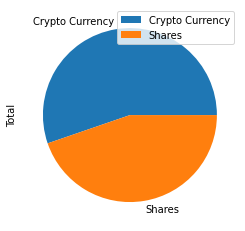

In [53]:
# Plot savings pie chart
savings_df.plot(kind= 'pie', subplots= True)

In [57]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df.sum().item()
total_savings
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on achieving a very safe emergency fund!"),
elif total_savings == emergency_fund:
    print("Congratulations for having an adequate fund for the unknown."),
else:
    print(f'You need ${emergency_fund - total_savings} to have enough for the emergency fund.')

Congratulations on achieving a very safe emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [58]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [60]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_df = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end =end_date
).df

# Display sample data
stock_data_df.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [76]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_MonteCarlo = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.40,.60],
    num_trading_days = 252*30,
    num_simulation = 500
)

In [77]:
# Printing the simulation input data
# YOUR CODE HERE!
thirty_yr_MonteCarlo.portfolio_data

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173   
...                           ...       ...       ...      ...       ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  24615464   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34239733   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9021388   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420   

                                             SPY                          \
                          daily_return      open    high     low   close   
time                                                                       
2015-08-07 00:00:00-04:00          NaN  208.1600  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.2800  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.9800  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.1100  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.7300  209.55  208.01  208.63   
...                                ...       ...     ...     ...     ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.76   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.03   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.06   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.31   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.55   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245  
...                              ...          ...  
2020-08-03 00:00:00-04:00   89861354     0.006768  
2020-08-04 00:00:00-04:00   73684427     0.003863  
2020-08-05 00:00:00-04:00   72941562     0.006151  
2020-08-06 00:00:00-04:00   76988181     0.006776  
2020-08-07 00:00:00-04:00   98710236     0.000718  

[1260 rows x 12 columns]

In [78]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_MonteCarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004188,0.998530,1.009357,0.985323,0.998481,1.000093,0.998489,0.999346,1.000155,0.994927,...,1.007783,0.996330,1.015896,1.013217,0.989299,1.010814,1.003604,0.992948,0.986548,0.996754
2,1.000651,1.003992,1.019607,0.974296,1.009811,0.987195,1.006401,1.004677,1.010547,0.981924,...,1.012288,0.991490,1.010405,1.003152,0.988968,1.012863,0.997168,0.983393,0.984751,1.001865
3,1.000652,1.017416,1.024862,0.973111,1.009962,0.978107,1.007347,1.008075,1.004072,0.980797,...,1.006136,1.010390,1.018473,1.003136,0.981842,1.016092,0.995830,0.979934,0.988111,0.998161
4,0.988625,1.004012,1.025657,0.978289,1.009897,0.983141,1.004959,1.016876,0.992543,0.976093,...,1.013817,1.018097,1.013105,0.995915,0.972755,1.011923,0.992261,0.975689,0.991531,0.990845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.607171,19.482108,6.847558,10.880837,12.359026,3.390517,22.663815,9.336021,5.292250,11.091403,...,4.920868,11.548319,3.582234,6.631547,18.176616,10.072585,13.219826,4.972771,4.596798,9.652880
7557,13.464353,19.422357,6.920601,10.702645,12.363424,3.402573,22.850259,9.496383,5.288698,11.003295,...,4.921906,11.616612,3.574895,6.648717,18.258932,10.101018,13.358708,4.939171,4.671291,9.793813
7558,13.408807,19.379278,6.831330,10.747635,12.351601,3.435000,22.930282,9.312566,5.357472,11.152282,...,4.929569,11.609254,3.587806,6.614970,18.194913,10.224634,13.527811,4.927777,4.693266,9.883278
7559,13.296663,19.250954,6.838581,10.800325,12.437443,3.452944,22.842112,9.313969,5.380203,11.037060,...,4.904605,11.609940,3.575700,6.606535,18.164067,10.111195,13.605237,4.897050,4.640333,9.963928


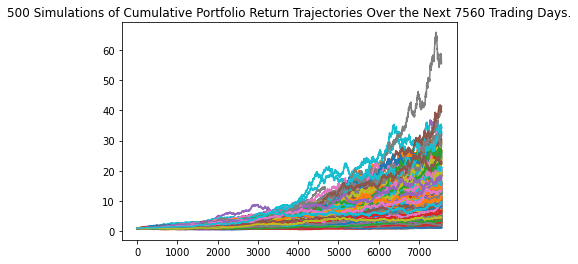

In [79]:
# Plot simulation outcomes
line_plot = thirty_yr_MonteCarlo.plot_simulation()

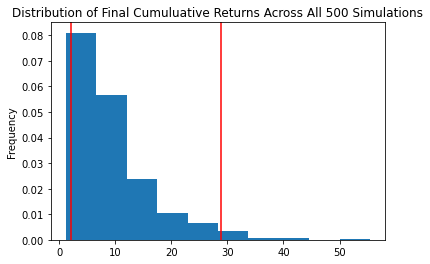

In [88]:
# Plot probability distribution and confidence intervals
dist_plot = thirty_yr_MonteCarlo.plot_distribution()

### Retirement Analysis

In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
table = thirty_yr_MonteCarlo.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean              9.562040
std               7.059250
min               1.165498
25%               4.840094
50%               7.250591
75%              12.123235
max              55.463244
95% CI Lower      2.167350
95% CI Upper     28.817215
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [82]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
lower_con_int = round(table[8]*initial_investment,2)
upper_con_int = round(table[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_con_int} and ${upper_con_int}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43347.01 and $576344.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
lower_con_int = round(table[8]*initial_investment,2)
upper_con_int = round(table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower_con_int} and ${upper_con_int}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65020.51 and $864516.46


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_yr_MonteCarlo = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.60,.40],
    num_trading_days = 252*5,
    num_simulation = 500
)

In [86]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_yr_MonteCarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012148,0.991459,1.001919,1.008199,0.996912,0.991639,1.005201,1.009639,0.997698,1.003637,...,1.003873,0.999320,1.003011,0.995760,1.018153,1.006524,1.002511,0.992238,1.015102,1.010152
2,1.007091,0.988462,1.002826,1.012175,0.998131,0.991023,1.007558,1.016270,1.003548,0.999762,...,0.997334,1.003597,1.000992,0.992579,1.026839,1.004727,0.994935,1.001164,1.023470,1.006557
3,1.018699,0.983053,1.002747,1.014534,0.994311,1.002624,1.006319,1.005448,0.992369,0.992591,...,1.005973,1.001561,1.001024,0.995915,1.039801,0.994847,0.995961,1.028811,1.021039,1.004726
4,1.015543,0.986942,1.008773,1.011809,0.989385,0.995276,1.010604,1.001036,0.998875,0.989667,...,0.999955,0.997374,1.005157,0.974534,1.050122,0.981178,1.001762,1.023107,1.017579,1.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.562049,1.303839,1.415541,1.657069,1.406379,1.289090,1.201329,1.081460,0.998906,0.996886,...,2.044184,1.324996,1.404047,1.214273,1.022549,1.032441,1.555071,1.027701,2.566717,1.388745
1257,1.559188,1.280802,1.407015,1.665052,1.405213,1.287432,1.195627,1.074668,0.988369,0.990629,...,2.051023,1.325326,1.416241,1.225907,1.027588,1.025795,1.566611,1.015298,2.562457,1.370981
1258,1.576923,1.285603,1.397800,1.671197,1.408530,1.289499,1.196430,1.064747,0.989815,0.987301,...,2.054922,1.327510,1.414387,1.214415,1.036925,1.025506,1.567527,1.011718,2.612188,1.372466
1259,1.566982,1.300995,1.404075,1.669939,1.414008,1.291591,1.201672,1.058430,0.979609,0.985597,...,2.058062,1.320407,1.414100,1.197648,1.027399,1.024533,1.570645,1.009993,2.604103,1.379019


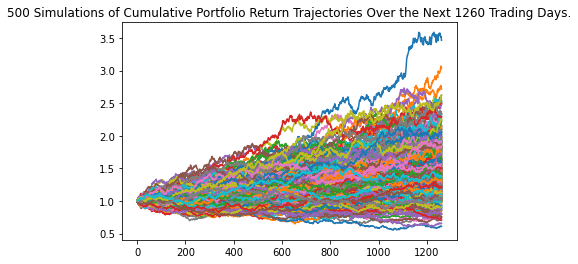

In [87]:
# Plot simulation outcomes
line_plot = five_yr_MonteCarlo.plot_simulation()

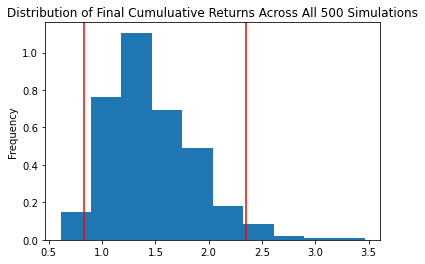

In [100]:
# Plot probability distribution and confidence intervals
dist_plot = five_yr_MonteCarlo.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
table2 = five_yr_MonteCarlo.summarize_cumulative_return()

# Print summary statistics
print(table2)

count           500.000000
mean              1.455337
std               0.402020
min               0.609316
25%               1.172314
50%               1.386744
75%               1.700571
max               3.465446
95% CI Lower      0.826105
95% CI Upper      2.345483
Name: 1260, dtype: float64


In [102]:
# Set initial investment
initial_inv2 = 45000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_con_int2 = round(table2[8]*initial_investment,2)
upper_con_int2 = round(table2[9]*initial_investment,2)
# Print results


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_inv2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_con_int2} and ${upper_con_int2}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 5 years will end within in the range of $24783.15 and $70364.48


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_MonteCarlo = MCSimulation(
    portfolio_data = stock_data_df,
    weights = [.55,.45],
    num_trading_days = 252*5,
    num_simulation = 500
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_MonteCarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


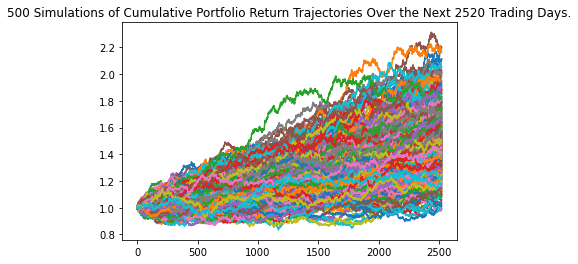

In [32]:
# Plot simulation outcomes
line_plot = ten_yr_MonteCarlo.plot_simulation()

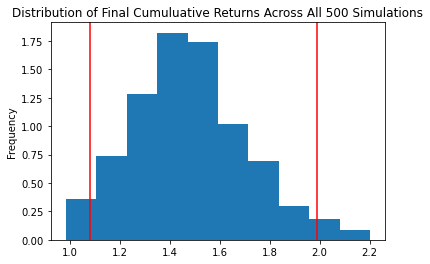

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = ten_yr_MonteCarlo.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
table3 = ten_yr_MonteCarlo.summarize_cumulative_return()

# Print summary statistics
print(table3)

NameError: name 'ten_yr_MonteCarlo' is not defined

In [97]:
# Set initial investment
initial_inv3 = 35000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
lower_con_int3 = round(table3[8]*initial_investment,2)
upper_con_int3 = round(table3[9]*initial_investment,2)
# Print results


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_inv3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${lower_con_int3} and ${upper_con_int3}")

NameError: name 'ci_lower_ten' is not defined